# A brief tutorial on how to access GALFRB output files

In [27]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os

plt.style.use('nick_style')

**Print available outputs**

In [9]:
def available_outputs() -> list:
    # Get the list of items in the current directory
    items = sorted(os.listdir('./output'))

    # Print a header for clarity
    print("Available output directories:\n" + "-"*75)

    # Print each item on a new line
    for idx, item in enumerate(items, start=1):
        print(f"{idx}. {item}")
    print("-"*75)

    return items

avail_files = available_outputs()

Available output directories:
---------------------------------------------------------------------------
1. mfLeja_sfLeja_chsharma-like_mnn_WSFR_N10000_n5_sduniform-vol_nzbins100_mladvanced_kTrue_0
2. mfLeja_sfLeja_chsharma-like_mnn_WSFR_N10000_n5_sduniform-vol_nzbins100_mladvanced_kTrue_1
3. mfLeja_sfLeja_chsharma-like_mnn_WSFR_N10000_n5_sduniform-vol_nzbins100_mladvanced_kTrue_2
---------------------------------------------------------------------------


**Print all available information within a stored dataset**

In [15]:
def print_available_information(fname: str) -> None:
    # Check if the file exists
    file_path = './output/' + fname + '/dataset.h5'
    if not os.path.exists(file_path):
        print(f"File '{file_path}' does not exist.")
        return

    # Check if the dataset is a group
    with h5py.File(file_path, 'r') as hf:
        if not isinstance(hf, h5py.Group):
            print(f"Dataset '{file_path}' is not a group.")
            return

        # Print the available information
        print("Available information stored in the .h5 file:\n" + "-"*75)

        # Get the names of the various datasets stored in the .h5 file
        other_datasets = list(hf.keys())

        # Get the attributes of the .h5 file
        attributes = hf.attrs

        # Print the names of the datasets
        for dataset in other_datasets:
            print(dataset)
        print("-"*75)

        # Print the attributes
        print("Attributes of the .h5 file:\n" + "-"*75)
        for attribute in attributes:
            print(attribute + ": " + str(attributes[attribute]))
        print("-"*75)

print_available_information(fname=avail_files[2])

Available information stored in the .h5 file:
---------------------------------------------------------------------------
Kcorr_samples
MtoL_samples
MtoLg_rest_samples
color_gr_grid
color_samples
density_sfr_color
lgsfr_mode_samples
lgsfr_samples
logm_samples
magcut_ind_flags
redshift_samples
sfr_grid
---------------------------------------------------------------------------
Attributes of the .h5 file:
---------------------------------------------------------------------------
Kr_correction: True
Nsample: 10000
completeness_handling: sharma-like
data_source: Sharma_full
description: Output was created on 2025-02-17.
dz: 0.1
mfunc_mstar0: 100000.0
mfunc_ref: Leja
mfunc_slope: 0
ml_sampling: advanced
mmax: 12.5
mmin: 6.5
mode: nn
n_realizations: 5
ndummy: 31
nlogm: 120
nsfr: 120
nz_bins: 100
posterior: True
sfr_ref: Leja
sfr_sampling: True
sfrmax: 3.0
sfrmin: -3.0
sigma_norm: 12.0
space_dist: uniform-vol
weight: SFR
zbins: [0.  0.2 0.4 0.7]
zgal: [0.1  0.3  0.55]
zmax: 1.2
zmin: 0.2
---

**Load data of interest**

In [29]:
def load_data(fname: str='specify_output_directory') :
    # Load the data
    with h5py.File('./output/'+ fname +'/dataset.h5', 'r') as hf :
        logm_samples = np.array(hf['logm_samples']) # log10(M/Msun)
        magcut_ind_samples = np.array(hf['magcut_ind_flags']) # Magnitude cut flags
        n_realizations = hf.attrs['n_realizations'] # Number of realizations per redshift bin
        zgal = hf.attrs['zgal']
        zbins = hf.attrs['zbins']
    return logm_samples, magcut_ind_samples, n_realizations, zgal, zbins


# Get the available information from the .h5 file
logm_samples, magcut_ind_samples, n_realizations, zgal, zbins = load_data(fname=avail_files[2])

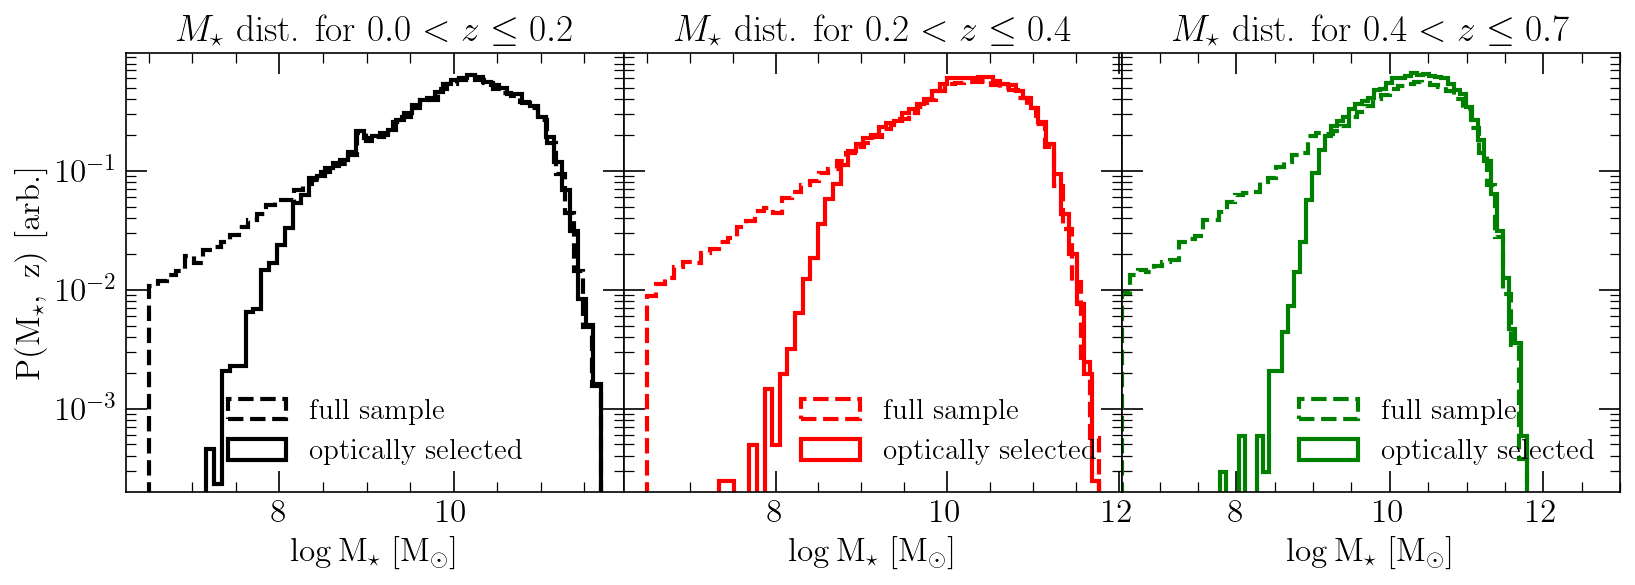

In [33]:
# plot stellar mass samples 
plt.subplots(1,3, sharey=True, figsize=(11,4), gridspec_kw={'wspace': 0, 'hspace': 0}) 
plt.subplot(131)
plt.ylabel("$\mathrm{P(M_\star,~z) ~ [arb.]}$")
clrs = ['black', 'red', 'green']
for counter in range(len(zgal)) :
    plt.subplot(131+counter)
    logm_sample = np.array(logm_samples[counter*n_realizations:(counter+1)*n_realizations]).ravel()
    flags_mcut = np.array(magcut_ind_samples[counter*n_realizations:(counter+1)*n_realizations]).ravel()
    plt.hist(logm_sample, bins=50, lw=2, density=True, ls='--', histtype='step', color=clrs[counter], label='full sample')
    plt.hist(logm_sample[flags_mcut], bins=50, lw=2, density=True, ls='-', histtype='step', color=clrs[counter], label='optically selected')
    plt.xlabel("$\mathrm{\log M_{\star} ~ [M_\odot]}$")
    plt.legend()
    plt.title(f"$M_\star$ dist. for ${zbins[counter]:.1f}<z\leq{zbins[counter+1]:.1f}$")

plt.yscale('log'); plt.xlim(6.51,13)

plt.tight_layout()
plt.show()

In [ ]:
# ... you can now make your own plots or analyses with the loaded data :)

#EOF